In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [9]:
# loading the mushroom dataset
df = pd.read_csv("mushroom.csv")

In [10]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [11]:
# dropping the index column unnamed 0
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [14]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [15]:
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


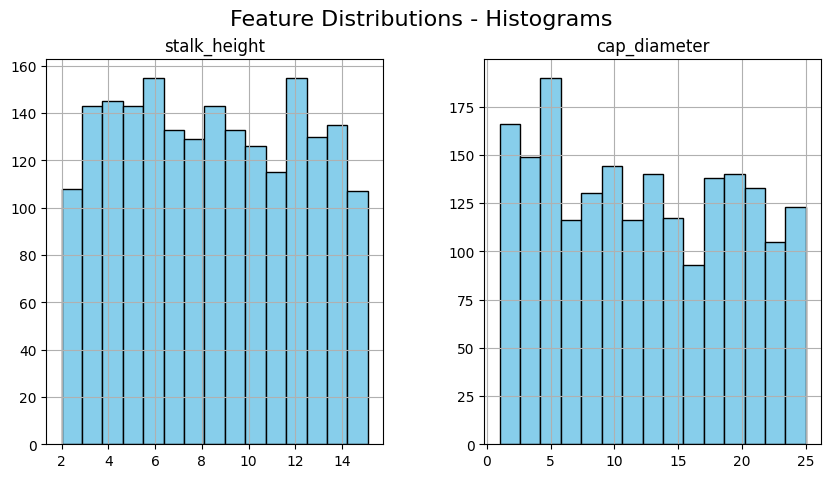

In [16]:
# Histogram for stalk_height and cap_diameter
df[['stalk_height', 'cap_diameter']].hist(figsize=(10, 5), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Histograms", fontsize=16)
plt.show()

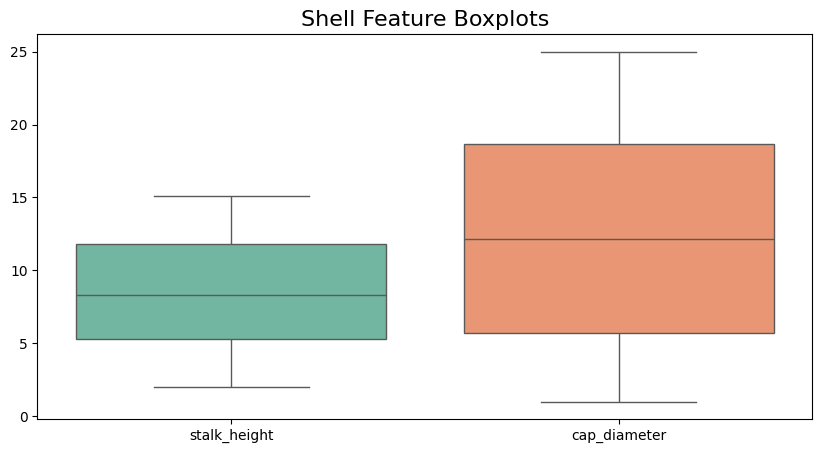

In [17]:
# Checking for outliers and spread in shell features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']], palette='Set2')
plt.title("Shell Feature Boxplots", fontsize=16)
plt.show()

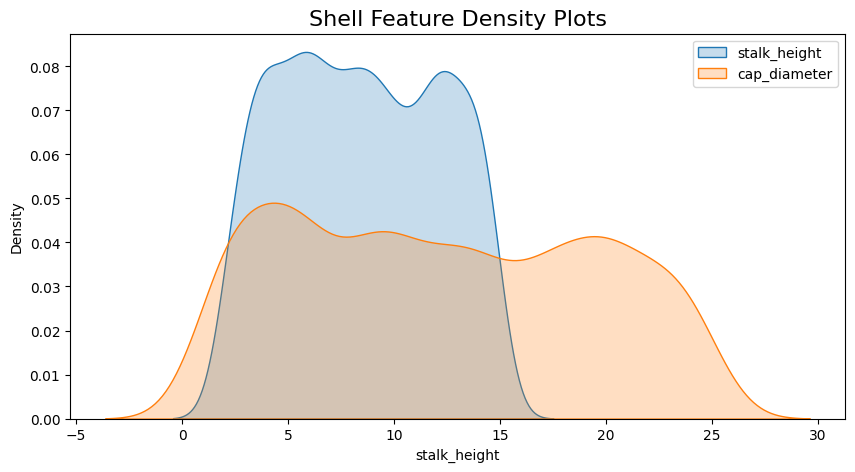

In [18]:
# Overlaying smooth curves to understand distribution shape of stalk height and cap diameter
plt.figure(figsize=(10, 5))
for col in ['stalk_height', 'cap_diameter']:
    sns.kdeplot(df[col], label=col, fill=True)
plt.title("Shell Feature Density Plots", fontsize=16)
plt.legend()
plt.show()

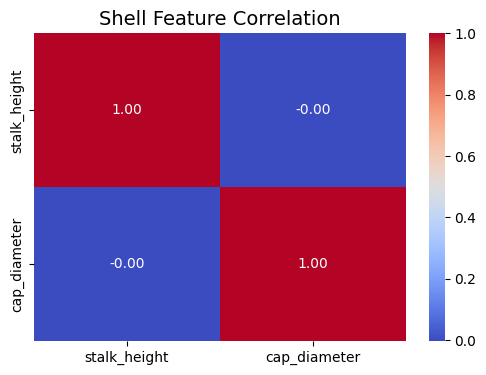

In [19]:
# Checking if stalk height and cap diameter are correlated—just for context, not for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(df[['stalk_height', 'cap_diameter']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Shell Feature Correlation", fontsize=14)
plt.show()

In [20]:
# creating a copy to preserve original dataset
df_encoded = df.copy()

# encoding all categorical columns using LabelEncoder
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
        df_encoded[col] = le.fit_transform(df_encoded[col])


In [21]:
df_encoded

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [22]:
# splitting the dataset while preserving class balance
X = df_encoded.drop('class', axis=1)  # features
y = df_encoded['class']               # target column

# using stratified sampling to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

/tmp/ipython-input-3790607051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_encoded, x="class", palette="Set2")


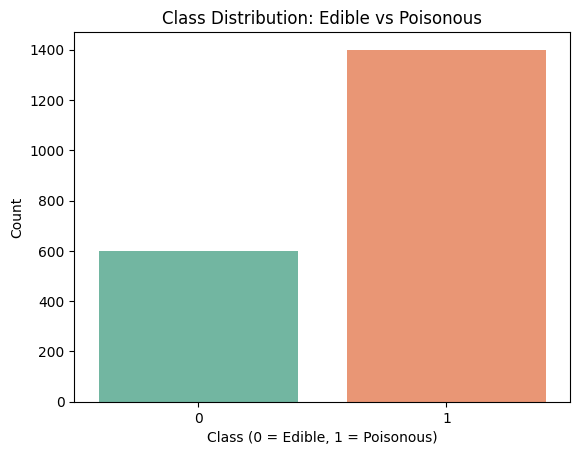

In [36]:
# Visualizing the count of edible vs poisonous mushrooms using encoded dataset
sns.countplot(data=df_encoded, x="class", palette="Set2")
plt.title("Class Distribution: Edible vs Poisonous")
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()

In [24]:
# poisonous mushrooms dominate the dataset, creating class imbalance
# misclassifying them as edible is risky—model must handle this bias carefully
# use class_weight='balanced' or stratified split to ensure fair learning

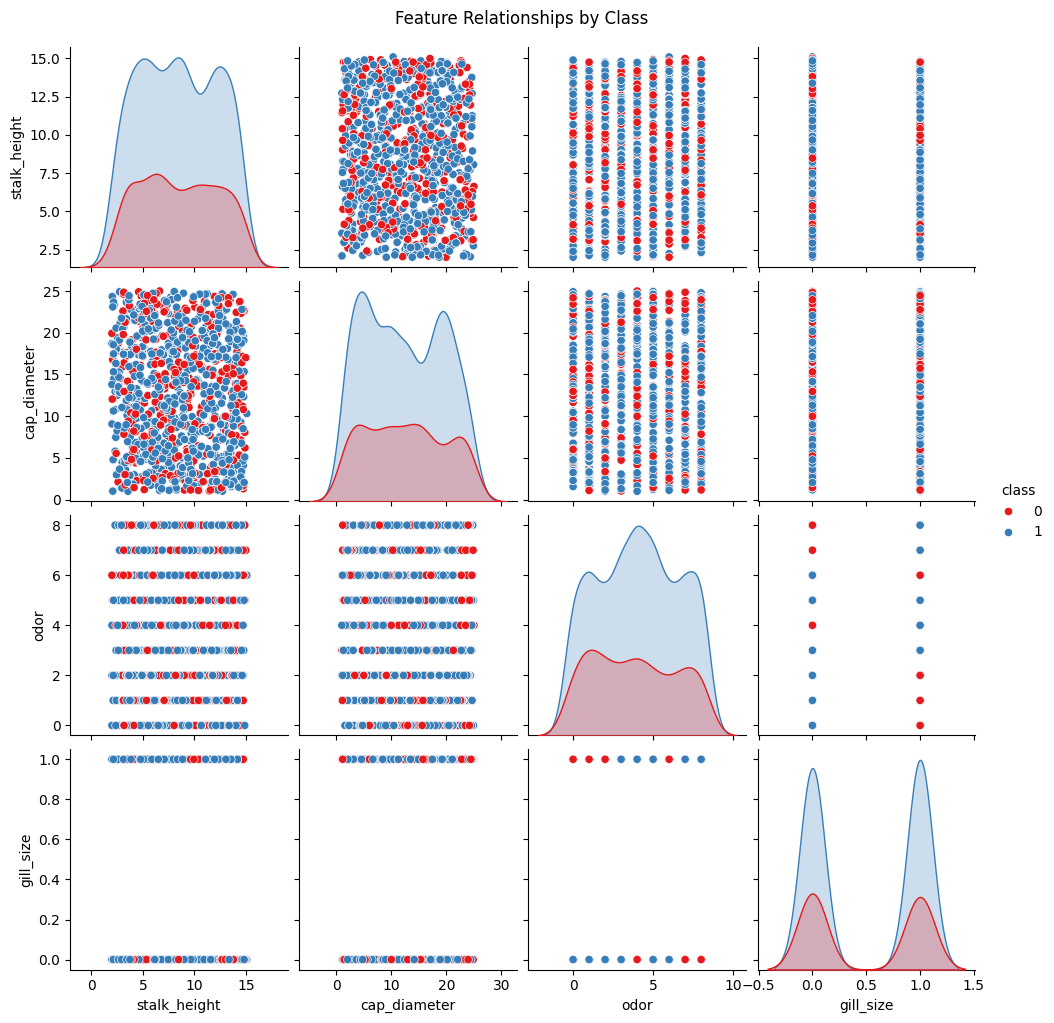

In [25]:
# exploring feature relationships with pair plot
selected_features = ['stalk_height', 'cap_diameter', 'odor', 'gill_size', 'class']

# pair plot with class-based coloring to reveal separability
sns.pairplot(df_encoded[selected_features], hue='class', palette='Set1')
plt.suptitle('Feature Relationships by Class', y=1.02)
plt.show()


In [26]:
# scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# initializing basic SVM model
svm_model = SVC(kernel='linear', random_state=42)

In [28]:
# training the SVM model using scaled data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# predicting on test data
y_pred = svm_model.predict(X_test_scaled)

# calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# printing results with exactly 4 digits
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1 Score: 0.8235


In [30]:
# show detailed performance metrics for both edible and poisonous classes
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["edible", "poisonous"]))



Detailed Classification Report:

              precision    recall  f1-score   support

      edible       0.00      0.00      0.00       120
   poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


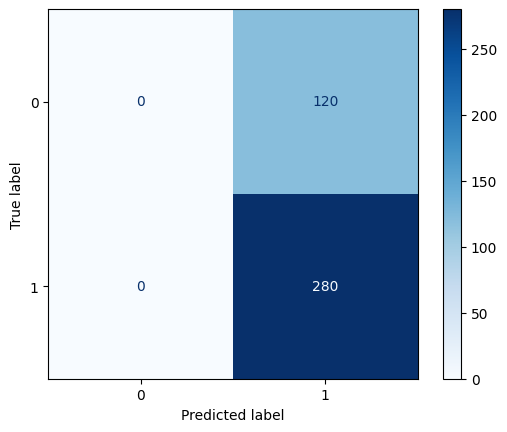

In [31]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)

# display the matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')

In [32]:
# defining the grid of hyperparameters to explore
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

# initializing the base SVM model
svm = SVC(random_state=42)

# running grid search to find the best combination
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# printing the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# extracting the best model from grid search
best_model = grid_search.best_estimator_

# making predictions using the optimized model
y_pred_best = best_model.predict(X_test_scaled)

# evaluating the optimized model's performance
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_best)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_best)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_best)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_best)))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.8500
Precision: 0.8716
Recall: 0.9214
F1 Score: 0.8958


In [33]:
# displaying all predicted labels from the test set
print("Predicted labels for test data:")
print(y_pred_best)

Predicted labels for test data:
[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1]


In [34]:
# compare predictions with actual labels
for actual, predicted in zip(y_test, y_pred_best):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predi

In [35]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k, C=10, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\nKernel: {k}")
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
    print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
    print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))


Kernel: linear
Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1 Score: 0.8235

Kernel: poly
Accuracy: 0.8525
Precision: 0.8576
Recall: 0.9464
F1 Score: 0.8998

Kernel: rbf
Accuracy: 0.8500
Precision: 0.8716
Recall: 0.9214
F1 Score: 0.8958


## Analyze SVM Strengths and Weaknesses Based on EDA and Visualizations
The Mushroom dataset consists entirely of categorical features, which were successfully encoded for SVM modeling. Exploratory Data Analysis showed a balanced class distribution between edible and poisonous mushrooms, making it suitable for classification tasks. SVM performed well across different kernels, especially with polynomial and RBF, which captured nonlinear patterns effectively. The linear kernel struggled with precision, misclassifying many edible mushrooms as poisonous. Visualizations confirmed that nonlinear kernels created more flexible decision boundaries, improving overall classification performance.

## Discuss Practical Implications of SVM in Real-World Classification Tasks
Support Vector Machines are highly effective in domains where safety and risk minimization are critical. In food safety applications, such as mushroom classification, high recall ensures that most poisonous mushrooms are correctly identified, reducing the risk of false negatives. However, lower precision may lead to false positives, unnecessarily flagging safe items. SVM’s ability to handle high-dimensional data and its robustness to outliers make it suitable for medical diagnostics, fraud detection, and other sensitive areas. The choice of kernel and regularization must be carefully tuned to balance caution and confidence, depending on the real-world impact of errors.